In [45]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
samnikolas_eeg_dataset_path = kagglehub.dataset_download('samnikolas/eeg-dataset')

print('Data source import complete.')


100%|██████████| 2.24M/2.24M [00:00<00:00, 124MB/s]

Extracting files...
Data source import complete.


In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-dataset/features_raw.csv


In [47]:
import os

# Print everything under /kaggle/input
for dirname, _, filenames in os.walk('/kaggle/input'):
    print("Directory:", dirname)
    for filename in filenames:
        print("  File:", filename)


Directory: /kaggle/input
Directory: /kaggle/input/eeg-dataset
  File: features_raw.csv


In [41]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [6]:
channels = 32
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False

In [34]:
df = pd.read_csv('/kaggle/input/eeg-dataset/features_raw.csv')
df.head(2)


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN


In [ ]:
df.shape

In [ ]:
plt.plot(df['Fp1'])


In [33]:
class EEGDataset2:
    def __init__(self, train_csv, seconds=0.500, fs=256, data_portion=1, normalize=True, isolated_channels=False):
        assert data_portion > 0.0 and data_portion <= 1, 'data_portion should be > 0 and <= 1'

        self.isolated_channels = isolated_channels
        self.normalize = normalize
        self.train_csv = train_csv
        self.seconds = seconds
        self.fs = fs
        self.data_portion = data_portion

    def get_data(self):
        df = pd.read_csv(self.train_csv)
        array_size = int(self.seconds * self.fs)


        if self.normalize:
            df = (df - df.mean()) / df.std()

        if self.isolated_channels:
            channels = []
            for channel in df.columns[0:32]:
                isolated_channel = []
                for i in range(int(len(df) / array_size)):
                    isolated_channel.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                channels.append(np.array(isolated_channel))
            return np.array
        dataset = []

        for channel in df.columns[0:32]:
            for i in range(int(len(df) / array_size)):
                dataset.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())

        return np.array(dataset)


In [15]:
train_csv = '/kaggle/input/eeg-dataset/features_raw.csv'
eegDataset = EEGDataset2(train_csv, 0.500, 256, 1, normalize=True)

train_dataset = eegDataset.get_data()

In [18]:
train_dataset.shape

(2016, 128)

In [ ]:
train_dataset[0]

In [17]:
clf = hbos.HBOS(n_bins=17, alpha=0.07, tol=0.5,contamination=.15)
clf.fit(train_dataset)

print("="*20)
print("TRAINING THE MODEL")

TRAINING THE MODEL


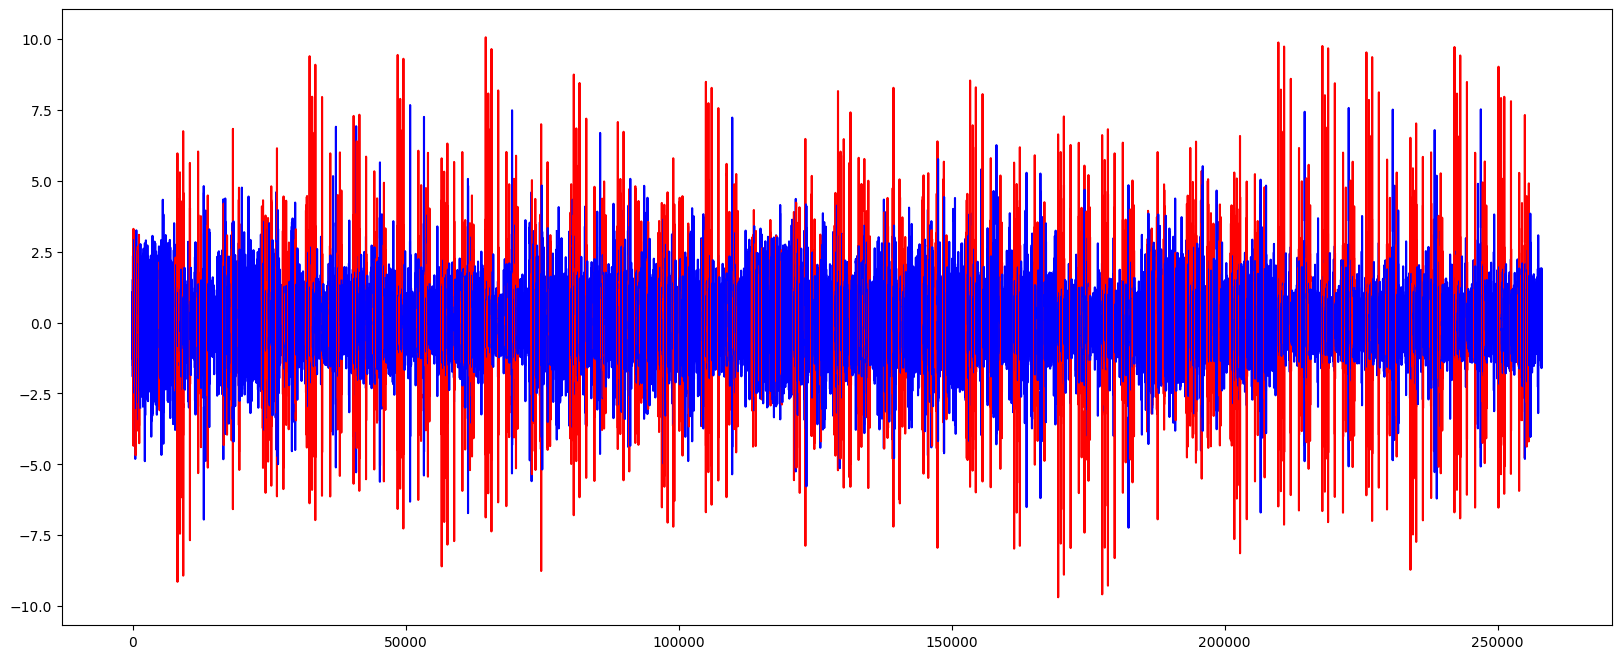

In [19]:
pred = clf.predict(train_dataset)

for i in range(len(pred)):
    plt.rcParams["figure.figsize"] = (20,8)

    if pred[i] == 1: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='red')
    else: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='b')

In [36]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import confusion_matrix,classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/eeg-dataset/features_raw.csv


In [32]:
data = pd.read_csv('/kaggle/input/emotions-detection/emotions.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/emotions-detection/emotions.csv'

In [23]:
data.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [26]:
data.shape

(8064, 33)

In [27]:
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

KeyError: 'label'

In [ ]:
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
def Transform_data(data):

    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)

    x=data_encoded.drop(["label"]  ,axis=1)

    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()

    scaler.fit(x)
    X = scaler.transform(x)

    Y = to_categorical(y)
    return X,Y

In [ ]:
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [ ]:
x_train.shape

**GRU**

In [ ]:
import tensorflow as tf

def create_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    expand_dims = tf.keras.layers.Reshape((x_train.shape[1], 1))(inputs)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

    flatten = tf.keras.layers.Flatten()(gru)

    dense = tf.keras.layers.Dense(128, activation='relu')(flatten)

    outputs = tf.keras.layers.Dense(3, activation='softmax')(dense)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

lstmmodel = create_model()

lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lstmmodel.summary()

In [ ]:
history1 = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

In [ ]:
test_loss, test_acc = lstmmodel.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

**CNN1 Model**

In [ ]:
def create_cnn1_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1], 1))  # Input shape: (sequence_length, 1)

    # Convolutional Layer
    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)

    # Pooling Layer
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)

    # Flatten the output
    flatten = tf.keras.layers.Flatten()(pool1)

    # Dense Layer
    dense = tf.keras.layers.Dense(128, activation='relu')(flatten)

    # Output Layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(dense)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create the CNN1 model
cnn1_model = create_cnn1_model()

# Compile the model
cnn1_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
cnn1_model.summary()

In [ ]:
history2 = cnn1_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = cnn1_model.evaluate(x_test, y_test)

In [ ]:
test_loss, test_acc = cnn1_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model Loss",fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

**CNN2 Model**

In [ ]:
def create_cnn2_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1], 1))  # Input shape: (sequence_length, 1)

    # First Convolutional Layer
    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)

    # Second Convolutional Layer
    conv2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu')(pool1)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)

    # Flatten the output
    flatten = tf.keras.layers.Flatten()(pool2)

    # Dense Layer
    dense = tf.keras.layers.Dense(128, activation='relu')(flatten)

    # Output Layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(dense)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create the CNN2 model
cnn2_model = create_cnn2_model()

# Compile the model
cnn2_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
cnn2_model.summary()

In [ ]:
history3 = cnn2_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = cnn2_model.evaluate(x_test, y_test)

In [ ]:
test_loss, test_acc = cnn2_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Model Loss",fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

**CNN3_Model**

In [ ]:
def create_cnn3_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1], 1))  # Input shape: (sequence_length, 1)

    # First Convolutional Layer
    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv1)

    # Second Convolutional Layer
    conv2 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu')(pool1)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv2)

    # Third Convolutional Layer
    conv3 = tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu')(pool2)
    pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(conv3)

    # Flatten the output
    flatten = tf.keras.layers.Flatten()(pool3)

    # Dense Layer with Dropout
    dense = tf.keras.layers.Dense(128, activation='relu')(flatten)
    dropout = tf.keras.layers.Dropout(0.5)(dense)

    # Output Layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(dropout)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create the CNN3 model
cnn3_model = create_cnn3_model()

# Compile the model
cnn3_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
cnn3_model.summary()

In [ ]:
history4 = cnn3_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = cnn3_model.evaluate(x_test, y_test)

In [ ]:
test_loss, test_acc = cnn3_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model Loss",fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

**ANN Model**

In [ ]:
def create_ann_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))  # Input shape: (sequence_length,)

    # First Dense Layer
    dense1 = tf.keras.layers.Dense(128, activation='relu')(inputs)

    # Second Dense Layer
    dense2 = tf.keras.layers.Dense(64, activation='relu')(dense1)

    # Output Layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(dense2)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create the ANN model
ann_model = create_ann_model()

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
ann_model.summary()

In [ ]:
history5 = ann_model.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = ann_model.evaluate(x_test, y_test)

In [ ]:
test_loss, test_acc = ann_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title("Model Loss",fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [ ]:
histories = {
    "GRU": history1,
    "CNN1": history2,
    "CNN2": history3,
    "CNN3": history4,
    "ANN": history5
}

**Training and Validation Accuracy for each Models**

In [ ]:
plt.figure(figsize=(14, 10))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


**Training and Validation loss for each Model**

In [ ]:
plt.figure(figsize=(14, 10))
for i, (name, history) in enumerate(histories.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

**Test Accuracy Comparisons**

In [ ]:
test_accuracies = {}
for name, history in histories.items():
    test_accuracies[name] = max(history.history['val_accuracy'])

plt.figure(figsize=(4, 4))
bars = plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
models = {
    "GRU": (lstmmodel, history1),
    "CNN1": (cnn1_model, history2),
    "CNN2": (cnn2_model, history3),
    "CNN3": (cnn3_model, history4),
    "ANN": (ann_model, history5)
}

In [ ]:
test_accuracies = {}
for name, (model, _) in models.items():
    if "CNN" in name or "GRU" in name:
        _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    else:
        _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies[name] = test_acc

In [ ]:
plt.figure(figsize=(4, 4))
bars = plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, (model, _) in models.items():
    if "CNN" in name or "GRU" in name:
        y_pred = model.predict(x_test)
    else:
        y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    precision_scores[name] = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall_scores[name] = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1_scores[name] = f1_score(y_true_classes, y_pred_classes, average='weighted')

metrics = {
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

**Precision, Recall and F1-score Comparison**

In [ ]:
plt.figure(figsize=(12,4))
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    plt.subplot(1, 3, i + 1)
    bars = plt.bar(metric_values.keys(), metric_values.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)
    plt.title(f'{metric_name} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Confusion Matrix Comparison**

In [ ]:
for name, (model, _) in models.items():
    if "CNN" in name or "GRU" in name:
        y_pred = model.predict(x_test)
    else:
        y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
model.save('lstmmodel.h5')
model.save('cnn1_model.h5')
model.save('cnn2_model.h5')
model.save('cnn3_model.h5')
model.save('ann_model.h5')